In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [13]:
X =  6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 * X + 2 + np.random.randn(200, 1)

#y = 0.8x^2 + 0.9x + 2

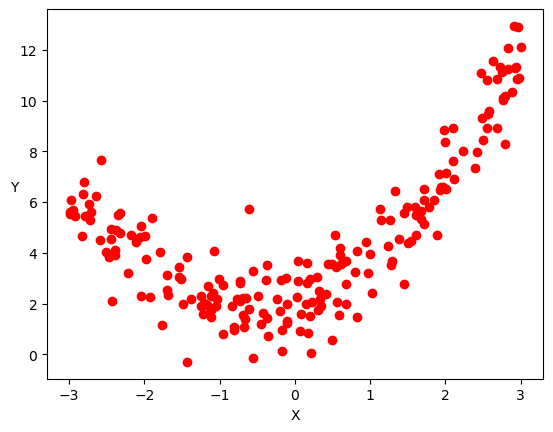

In [14]:
plt.scatter(X,y, color='red')
plt.xlabel("X",rotation=0)
plt.ylabel("Y",rotation=0)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=2)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

### Applying Linear Regression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

-0.2229157943960589

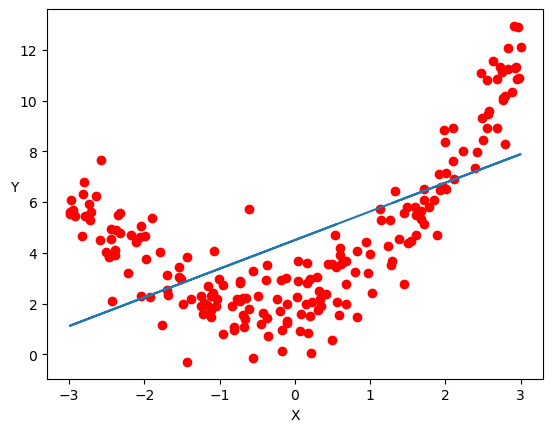

In [23]:
plt.scatter(X,y, color='red')
plt.plot(X_train, lr.predict(X_train))
plt.xlabel("X",rotation=0)
plt.ylabel("Y",rotation=0)
plt.show()

### Applying Polynomial Linear Regression

In [24]:
pol = PolynomialFeatures(degree=2)

X_train_trf = pol.fit_transform(X_train)
X_test_trf = pol.transform(X_test)

In [29]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [28]:
X_train_trf.shape, X_test_trf.shape

((160, 3), (40, 3))

In [36]:
X_train[:]

array([[ 0.54030908],
       [-1.97561794],
       [ 2.68536381],
       [-0.83522612],
       [-2.64579183],
       [-2.04229613],
       [ 2.48441679],
       [-2.39167716],
       [ 2.7463688 ],
       [-0.19655519],
       [-2.39460755],
       [ 1.67505411],
       [-0.95767526],
       [ 0.63300538],
       [-1.48597887],
       [ 1.60878714],
       [ 0.16331181],
       [-1.08570963],
       [-0.11044846],
       [-0.68496688],
       [-0.95924397],
       [ 2.00024965],
       [ 0.94556293],
       [-0.67585208],
       [-2.44463378],
       [-0.12235417],
       [ 2.79678761],
       [ 0.49503799],
       [-0.42131069],
       [ 0.03567085],
       [-1.99068704],
       [ 0.52551631],
       [ 0.20106278],
       [ 1.44725209],
       [ 2.82979279],
       [-0.66742337],
       [ 2.55031185],
       [-1.79854156],
       [ 0.67274132],
       [ 0.43561478],
       [-2.82902276],
       [-0.56235216],
       [ 1.27597625],
       [-0.7253592 ],
       [ 0.56122645],
       [ 2

In [38]:
X_train_trf[:,1]

array([ 0.54030908, -1.97561794,  2.68536381, -0.83522612, -2.64579183,
       -2.04229613,  2.48441679, -2.39167716,  2.7463688 , -0.19655519,
       -2.39460755,  1.67505411, -0.95767526,  0.63300538, -1.48597887,
        1.60878714,  0.16331181, -1.08570963, -0.11044846, -0.68496688,
       -0.95924397,  2.00024965,  0.94556293, -0.67585208, -2.44463378,
       -0.12235417,  2.79678761,  0.49503799, -0.42131069,  0.03567085,
       -1.99068704,  0.52551631,  0.20106278,  1.44725209,  2.82979279,
       -0.66742337,  2.55031185, -1.79854156,  0.67274132,  0.43561478,
       -2.82902276, -0.56235216,  1.27597625, -0.7253592 ,  0.56122645,
        2.09414413, -1.11400491,  0.82287459,  2.47695662,  1.70980673,
       -0.81037183,  0.02845445, -2.97985879,  2.00039188,  1.8531938 ,
       -2.92296042, -2.72811801,  1.9092474 ,  0.82088094,  2.998618  ,
       -1.16204133, -1.68517086,  2.78900706, -0.77022221,  0.15061964,
       -0.60477762, -0.37230582,  1.78087061,  2.54643101,  0.07

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train_trf, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test_trf)

In [44]:
r2_score(y_test, y_pred)

0.8495783191161959

In [45]:
lr.intercept_

array([2.21956354])

In [46]:
lr.coef_

array([[0.        , 0.92727638, 0.7616761 ]])

In [49]:
X_new = np.linspace(-2, 3, 200).reshape(200, 1)
X_new_poly = pol.transform(X_new)
y_new = lr.predict(X_new_poly)

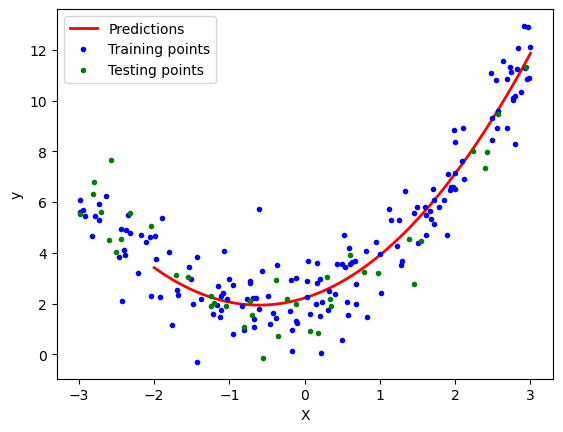

In [50]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [53]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = pol.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

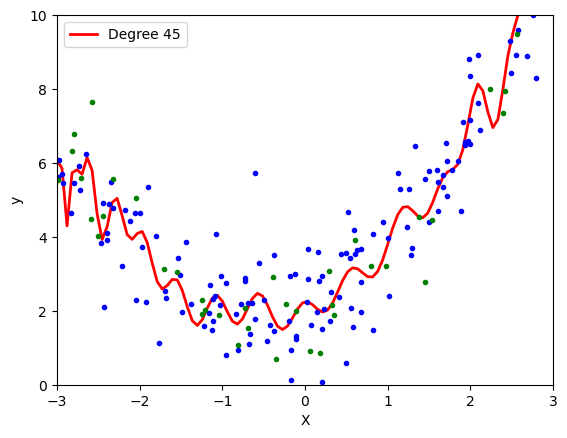

In [59]:
polynomial_regression(45)